## Bài tập 1
Cho 1 chuỗi s đại diện cho 1 biểu thức, viết chương trình thực hiện biểu thức đó và trả về kết quả cuối cùng. Các điều kiện của bài toán bao gồm
+ Khi thực phép chia, làm tròn số gần tiến về 0 nhất (ví dụ 5/2 = 2, -5/2 = -2)
+ Độ dài của chuỗi s từ 1-100.
+ s chỉ bao gồm các số nguyên và phép toán ('+', '-', '*', '/'). Biểu thức có thể chứa hoảng trắng.
+ Tất cả các số trong s là số nguyên dương nằm trong đoạn [0 100]

Ví dụ

s = " 3 - 5/2 " => 1

s = "3-5/2" => 1

In [1]:
import math
def Calculate(s):
    s.replace(" ",'') #Delete whitespace 
    total = 0
    last_sign = '+'
    curr_num = 0
    last = 0
    operator = {'+','-','*','/'}
    i = 0
    while i < len(s):
        if s[i].isdigit(): #S[i] is number
            curr_num = 0
            while i < len(s) and s[i].isdigit():
                curr_num = curr_num * 10 + int(s[i])
                i += 1
            total, last = Update_sum(curr_num, last_sign, total, last) #Update sum after traverse to each number
        else: #S[i] is operator
            if s[i] in operator:
                last_sign = s[i]
            i+=1
    return total
    
def Update_sum(num, sign, total, last):
    if sign == '+':
        last = num
        total += last
    elif sign == '-':
        last = -num
        total += last
    elif sign == '*': #Sum include last before reaching * or / 
    #so we have to substract last number to execute * or / then re-add result to sum
        total -= last
        last = last * num 
        total += last
    else:
        total -= last
        temp = math.floor(last/num)
        if (temp < 0):
            last = temp + 1
        else:
            last = temp
        total += last
    return (total,last)
    
def main():
    s = input()
    print(Calculate(s))
main()

 8/3*6


12


# Bài tập 2
Cho một chuỗi coded_str chứa các ký tự đã được mã hóa theo cách sau k[string], trong đó k là số lần string trong dấu [] được lập lại.
Điều kiện: coded_str là các chuỗi các ký tự tiếng Anh và string chỉ chứa các ký tự [a-z]
và [A-Z] không có ký tự đăc biệt và không phải là số. Nếu là số thì bắt buộc phải là k và
đứng trước [].

Ví dụ:

Input: coded_str = "2[abc]3[cd]ef"

Output: "abcabccdcdcdef"

Input: coded_str = "abc3[cd]xyz"

Output: "abccdcdcdxyz"

In [ ]:
def Convert_String(s):
    #create empty stack
    stack = []
    for i in range (len(s)):
        if s[i] != "]": # Push all the element from s to stack until reach "]"
            stack.append(s[i])
        else: # Reach "]"
            temp = ""
            while stack and stack[-1] != "[":
                temp = stack.pop() + temp # Insert reversely to LIFO order of stack
            stack.pop()
            number = ""
            while stack and stack[-1].isdigit():
                number = number + stack.pop()
            stack.append(int(number) * temp)
    return "".join(stack)
def main():
    code_str = input()
    ans = Convert_String(code_str)
    print(ans)
    
main()

## Bài tập 3
Các bạn đọc hiểu các hàm built-in function trong python (3.8) ở link sau
https://docs.python.org/3.8/library/functions.html
Với mỗi hàm, các bạn chú thích ngắn gọn ý nghĩa của hàm đó và làm một ví dụ đơn giản
để minh họa.
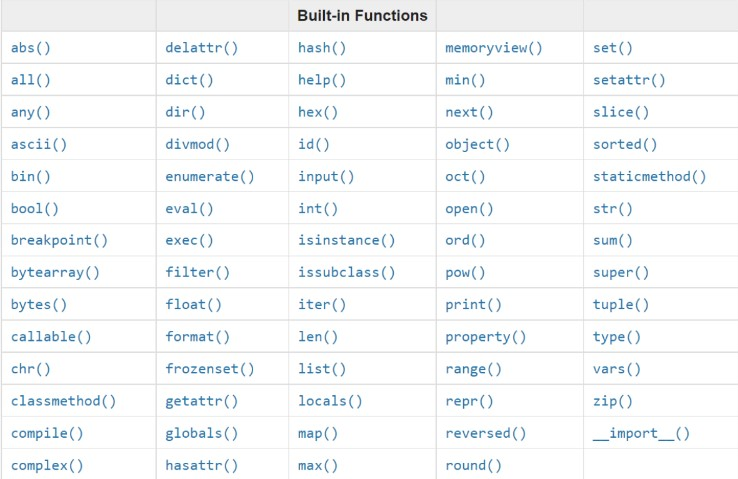

In [16]:
#abs(): Return the absolute value of a number.
print(abs(-100))

100


In [20]:
#round(number[, ndigits])
#Return number rounded to ndigits precision after the decimal point. 
#If ndigits is omitted or is None, it returns the nearest integer to its input.
round(1.5)


2

In [3]:
#class slice(start, stop[, step])
#Return a slice object representing the set of indices specified by range(start, stop, step).

string1 = "Khoa hoc ML & Python"
string2 = string1[9:]
print(string2)

ML & Python


In [5]:
#all(iterable)
#Return True if all elements of the iterable are true (or if the iterable is empty). Equivalent to:

mylist = [True, True, True]
x = all(mylist)
print(x)

True


In [13]:
#The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.

person = {'A','B','C','D'}
age = {'20','30','40','50'}
x= dict(zip(person,age))
print(x)


{'A': '20', 'B': '50', 'C': '30', 'D': '40'}


In [14]:
#Map(function, iterable, ...)
#Return an iterator that applies function to every item of iterable, yielding the results.
def Take_square(x):
    return x**2
a = [1,2,3,4,5]
x = map(Take_square,a)
print(list(x))

[1, 4, 9, 16, 25]


## Bài tập 4
Cho một list các số nguyên num_list và một sliding window có kích thước size k di chuyển từ trái sang phải. Mỗi lần dịch chuyển 1 vị trí sang phải có thể nhìn thấy đươc k số trong num_list và tìm số lớn nhất trong k số này sau mỗi lần trượt. k phải lớn hơn hoặc bằng 1
Input: num_list = [3, 4, 5, 1, -44 , 5 ,10, 12 ,33, 1]
Output: [5, 5, 5, 5, 10, 12, 33, 33]
+ **[3, 4, 5]**, 1, -44 , 5 ,10, 12 ,33, 1 => max 5
+ 3, **[4, 5, 1]**, -44 , 5 ,10, 12 ,33, 1 => max 5
+ 3, 4, **[5, 1, -44]** , 5 ,10, 12 ,33, 1 => max 5
+ 3, 4, 5, **[1, -44 , 5]** ,10, 12 ,33, 1 => max 5
+ 3, 4, 5, 1, **[-44 , 5 ,10]**, 12 ,33, 1 => max 10
+ 3, 4, 5, 1, -44 , **[5 ,10, 12]** ,33, 1 => max 12
+ 3, 4, 5, 1, -44 , 5 ,**[10, 12 ,33]**, 1 => max 33
+ 3, 4, 5, 1, -44 , 5 ,10, **[12 ,33, 1]** => max 33

In [15]:
# Using for nested loop
def Max_of_K_element(a,n,k):
    result = []
    max = 0
    for i in range (0, n - k + 1):
        max = a[i]
        for j in range (1, k):
            if a[i+j] > max:
                max = a[i+j]
        print(str(max) + " ",end = "")

def main():
    ele = 0
    a = []
    n = int(input())
    for i in range (0,n):
        ele = int(input())
        a.append(ele)
    k = int(input())
    Max_of_K_element(a,n,k)
main()

# #Using deque 
# from collections import deque
 
# def Max(arr, n, k):
#     Qi = deque()
     
#     # Process first k elements
#     for i in range(k):
#         while Qi and arr[i] >= arr[Qi[-1]] :
#             Qi.pop()
         
#         # Add new element at rear of queue
#         Qi.append(i);
    
#     #Processing remain elements
#     for i in range(k, n):
#         print(str(arr[Qi[0]]) + " ", end = "")
#         while Qi and Qi[0] <= i-k:
#             Qi.popleft()
#         #The same process with first k element
#         while Qi and arr[i] >= arr[Qi[-1]] :
#             Qi.pop()
#         Qi.append(i)
#     # Print the maximum element of last window
#     print(str(arr[Qi[0]]))
    
# def main():
#     ele = 0
#     a = []
#     n = int(input())
#     for i in range (0,n):
#         ele = int(input())
#         a.append(ele)
#     k = int(input())
#     Max(a, n, k)
# main()


 10
 3
 4
 5
 1
 -44
 5
 10
 12
 1
 33
 3


5 5 5 5 10 12 12 33


## Bài tập 5
Cho hai list các số nguyên là num_list1 và num_list2, trả về các list các số cũng xuất hiện trong hai list, thứ tự không quan trọng.

Input: nums1 = [1,2,2,1], nums2 = [2,2]

Ouput: [2,2]

Input: nums1 = [4,9,5], nums2 = [9,4,9,8,4]

Output: [4,9] hoặc [9, 4]

In [4]:
def Common_Element(a, b):
    result = []
    for i in a:
        if i in b:
            result.append(i)
    return result
def main():
    nums1 = input()
    nums1 = nums1.split()
    nums2 = input()
    nums2 = nums2.split()
    ans = Common_Element(nums1, nums2)
    print(ans)
main()

 4 9 5
 9 4 9 8 4


['4', '9']


## Bài tập 6
Cho một chuỗi DNA, được tạo bởi các nucleotides 'A', 'C', 'G' và 'T'. Khi nghiên cứu về DNA cần phải nhận dạng các chuỗi được lập lại trong DNA. Bài tóa cho một chuối s là DNA, hãy trả về các chuỗi có 10 chữ cái được lập lại nhiều hơn một lần dựa vào s (Thứ tự trả về không quan trọng).
Ví Dụ:

s = "TTTTTGGGGGTTTTTGGGGGGTTTTTAAACCC"

ouput = ['TTTTTGGGGG', 'GGGGGTTTTT']

s = "TTTTTTTTTTTTTTTTTTTT"

ouput = ['TTTTTTTTTT']

In [13]:
#Using sets are not allow dupplicate substrings
def Repeated_Substring(s):
    check = set()
    output = set()
    for i in range (0, len(s) - 9): #Slide each part of 10 characters
        cur_substr = s[i:i + 10]
        if cur_substr in check: #Check if each part is dupplicated or not
            output.add(cur_substr) 
        check.add(cur_substr) #Add every 10-character part in set 
    return list(output)

def main():
    s = input()
    ans = Repeated_Substring(s)
    print(ans)

main()

 TTTTTGGGGGTTTTTGGGGGGTTTTTAAACCC


['GGGGGTTTTT', 'TTTTTGGGGG']


## Bài tập 7
Code lại các ví dụ về coin simulation, ước lượng số e và PI dùng while.
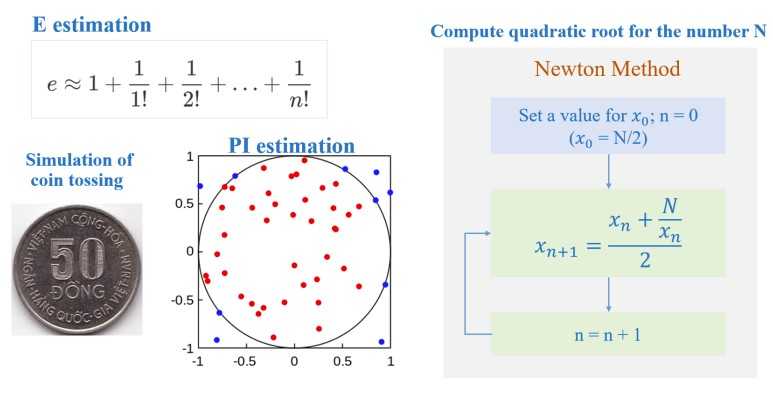

In [22]:
#e estimation
import math
def Cal_e(degree):
    sum = 0
    for i in range (0, degree + 1):
        sum += 1/math.factorial(i)
    return sum
def main():
    n = int(input())
    print(Cal_e(n))
main()

 5


2.7166666666666663


In [17]:
#pi estimation
import random

repeat = 10000 #10000 random times
point_in_circle = 0
point_in_square = 0
for i in range (0,repeat):
    #Create random point
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    check = x**2 + y**2
    if check <= 1: #Check whether random point is in the circle
        point_in_circle += 1
    point_in_square += 1
pi = 4 * point_in_circle / point_in_square
print(pi)

3.1492


## Bài tập 8
Code các hàm để cài đặt tam giác Pascal và dãy số Fibonacci
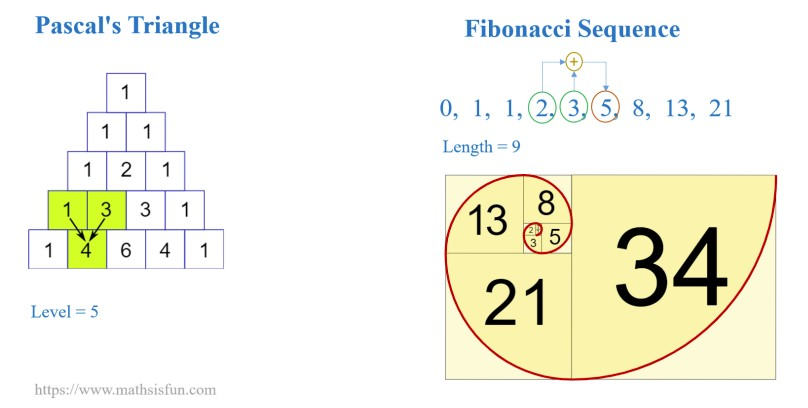

In [14]:
# #Pascal triangle (Geometry)
# def Pascal_Triangle(n):
#     for i in range(1, n + 1):
#         coef = 1
#         for k in range (n - i , 0, -1):
#             print(" ",end = "")
#         for j in range (1, i + 1): 
#             print(str(coef) + " ", end ="")
#             coef = int(coef * (i-j)/j)
#         print("\n")
# def main():
#     Pascal_Triangle(5)
    
# main()

#Pascal triangle in list

def Pascal_Triangle(n):
    #Create list has n row
    triangle = [[] for i in range (n)]
    for i in range (n):
        for j in range(i + 1):
            if (j == 0 or j == i): # At frond and end of each row
                triangle[i].append(1)
            else:
                triangle[i].append(triangle[i-1][j-1] + triangle[i-1][j]) #Calculate remains element in row
    return triangle
    
def main():
    print(Pascal_Triangle(5))
main()

    

[[1], [1, 1], [1, 2, 1], [1, 3, 3, 1], [1, 4, 6, 4, 1]]


In [15]:
#Fibonacci Sequence
def Fibonacci(n):
    if (n == 0 or n == 1):
        return n
    else:
        return (Fibonacci(n-1) + Fibonacci(n-2))
#Print n first element in fibonacci sequence
def main():
    n = int(input())
    for i in range (0,n + 1):
        print (str(Fibonacci(i)) + " ", end ="")
main()


 5


0 1 1 2 3 5 

## Bài tập 9
Viết các hàm để ước lượng các hàm số sau
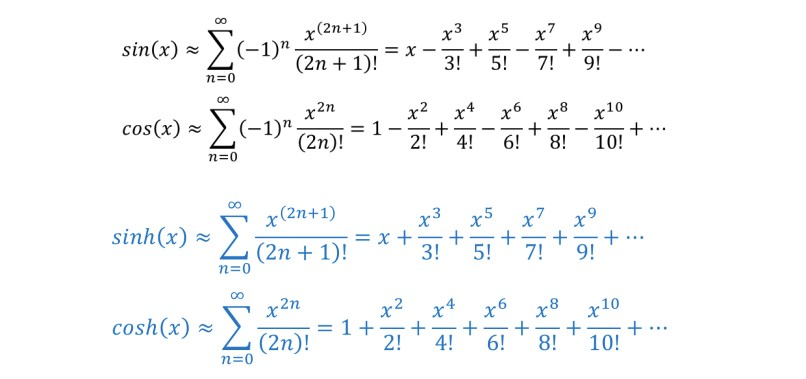

In [16]:
#Calculate sin(x)
import math
def sin(x, degree):
    sum = 0
    for i in range (0,degree):
        sign = (-1)**i
        pi = math.pi
        gradian = x*(pi/180)
        sum += sign*(gradian**(2*i+1))/math.factorial(2*i+1)
    return sum
def main():
    x = float(input())
    degree = int(input())
    print(sin(x,degree))
    print(math.sin(x*math.pi/180))
main()


 60
 5


0.8660254450997811


In [2]:
#Calculate cos(x) 

import math
def cos(x, degree):
    sum = 0
    for i in range (0, 2*degree):
        sign = (-1)**i
        pi = math.pi
        gradian = x*(pi/180)
        sum += sign*(gradian**(2*i))/math.factorial(2*i)
    return sum
def main():
    x = float(input())
    degree = int(input())
    print(cos(x,degree))
    print(math.cos(x*math.pi/180))
main()

 60
 3


0.4999999963909432
0.5000000000000001


In [1]:
#Calculate sinh(x)
import math
def sinh(x, degree):
    sum = 0
    for i in range (0,degree):
        pi = math.pi
        gradian = x*(pi/180)
        sum += (gradian**(2*i+1))/math.factorial(2*i+1)
    return sum
def main():
    x = float(input())
    degree = int(input())
    print(sinh(x,degree))
    print(math.sinh(x*math.pi/180))
main()

 30
 3


0.5478513249966626
0.5478534738880397


In [3]:
#Calculate cosh(x)
import math
def cosh(x, degree):
    sum = 0
    for i in range (0,degree):
        pi = math.pi
        gradian = x*(pi/180)
        sum += (gradian**(2*i))/math.factorial(2*i)
    return sum
def main():
    x = float(input())
    degree = int(input())
    print(cosh(x,degree))
    print(math.cosh(x*math.pi/180))
main()

 30
 3


1.1402095612237848
1.1402383210764286


## Bài tập 10
Cho một số nguyên dương n, viết phương trình đảo ngược thứ tự các vị trí trong số n. Chỉ while (hay for) và những phép toán cơ bản như + - * / % //.
Ví dụ:

 123456789 => 987654321
 
12345678910 => 1987654321


In [ ]:
def Reverse(n):
    temp = 0
    result = 0
    while (n != 0):
        temp = n % 10
        result = result * 10 + temp
        n = n // 10
    return result

def main():
    n = int(input())
    print(Reverse(n))

main()
        

## Bài tập bổ sung
(phần làm thêm, không bắt buộc) Các bạn hãy tìm hiểu về các tính chất của các hàm s-shaped gồm sigmoid, tanh và arctan. Đồng thời các bạn hãy xây dựng công thức đạo hàm của ba hàm trên
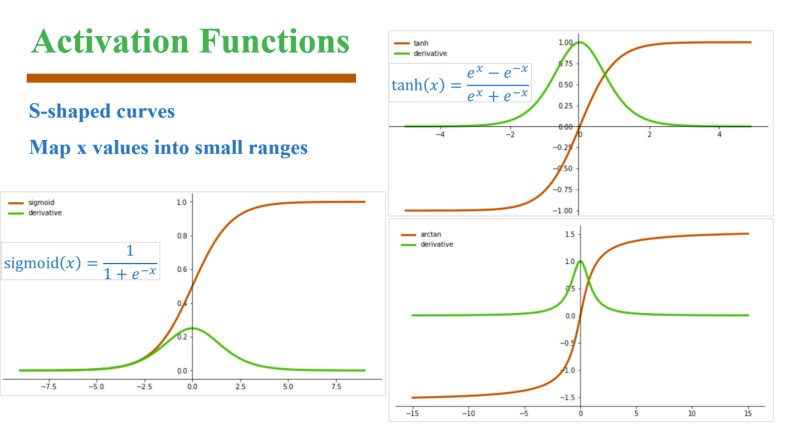

In [7]:
#Sigmoid:
import math
e = math.e
def Sigmoid(x):
    return 1/(1+e**(-x))
def Differ_Sigmoid(x):
    return Sigmoid(x)*(1-Sigmoid(x))
def main():
    x = int(input())
    print(Sigmoid(x))
    print(Differ_Sigmoid(x))
main()

 3


0.9525741268224331
0.0451766597309122


In [8]:
#Tanh:
import math
e = math.e
def Tanh(x):
    return (e**x-e**(-x))/(e**x+e**(-x))
def Differ_Tanh(x):
    return 1 - Tanh(x)**2
def main():
    x = int(input())
    print(Tanh(x))
    print(Differ_Tanh(x))
main()

 4


0.9993292997390669
0.0013409506830260876


In [10]:
#Arctan
import math
e = math.e
def Arctan(x):
    return math.atan(x)
def Differ_Arctan(x):
    return 1/(1+x**2)
def main():
    x = int(input())
    gradian = x *math.pi/180
    print(Arctan(gradian))
    print(Differ_Arctan(gradian))
main()

 30


0.48234790710102493
0.7848334527852401
